### Titanic Survival Prediction: Machine Learning Model 
ML Models used: XGBoost,  Logistic Regression \
By - Maka Jokhadze




* Data Cleaning

* Exploratory Data Analysis

* Feature Engineering

* Model Building

* Results

### Data Cleaning

In [1021]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

# ვტირთავთ ტიტანიკის ბაზებს
train = pd.read_csv('train_data.csv')
test=pd.read_csv('test_data.csv')
train.head()

,PassengerId,Pclass\t,Survival,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Boat,Body,Home_Dest
0,1,3,1,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",female,24.0,0,2,PP 9549,16.7000,G6,S,13,NaN,NaN
1,2,1,0,"McCaffry, Mr. Thomas Francis",male,46.0,0,0,13050,75.2417,C6,C,NaN,292.0,"Vancouver, BC"
2,3,3,0,"Goncalves, Mr. Manuel Estanslas",male,38.0,0,0,SOTON/O.Q. 3101306,7.0500,NaN,S,NaN,NaN,Portugal
3,4,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
4,5,2,1,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...",female,29.0,1,0,2926,26.0000,NaN,S,16,NaN,NaN


In [1022]:
#  ვარკვევთ რა და რა ტიპის სვეტები გვაქვს და სად გვაქვს "missing data"
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  916 non-null    int64  
 1   Pclass	      916 non-null    int64  
 2   Survival     916 non-null    int64  
 3   Name         916 non-null    object 
 4   Sex          916 non-null    object 
 5   Age          724 non-null    float64
 6   SibSp        916 non-null    int64  
 7   Parch        916 non-null    int64  
 8   Ticket       916 non-null    object 
 9   Fare         915 non-null    float64
 10  Cabin        197 non-null    object 
 11  Embarked     915 non-null    object 
 12  Boat         345 non-null    object 
 13  Body         81 non-null     float64
 14  Home_Dest    515 non-null    object 
dtypes: float64(3), int64(5), object(7)
memory usage: 107.5+ KB


In [1023]:
#  ვარკვევთ რა და რა ტიპის სვეტები გვაქვს და სად გვაქვს "missing data"
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  393 non-null    int64  
 1   Pclass	      393 non-null    int64  
 2   Survival     393 non-null    int64  
 3   Name         393 non-null    object 
 4   Sex          393 non-null    object 
 5   Age          322 non-null    float64
 6   SibSp        393 non-null    int64  
 7   Parch        393 non-null    int64  
 8   Ticket       393 non-null    object 
 9   Fare         393 non-null    float64
 10  Cabin        98 non-null     object 
 11  Embarked     392 non-null    object 
 12  Boat         141 non-null    object 
 13  Body         40 non-null     float64
 14  Home_Dest    230 non-null    object 
dtypes: float64(3), int64(5), object(7)
memory usage: 46.2+ KB


In [1024]:
train.isnull().sum() 

PassengerId      0
Pclass\t         0
Survival         0
Name             0
Sex              0
Age            192
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          719
Embarked         1
Boat           571
Body           835
Home_Dest      401
dtype: int64

In [1025]:
test.isnull().sum() 

PassengerId      0
Pclass\t         0
Survival         0
Name             0
Sex              0
Age             71
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          295
Embarked         1
Boat           252
Body           353
Home_Dest      163
dtype: int64

In [1026]:
# დავთვალე პროცენტულად რამდენია missing data სვეტებში , რათა გადამეწყვიტა დავტოვო თუ არა 
#და რამდენად ღირს ამ მონაცემების შევსება

# სულ ხაზი
train_total_entries = 916


Train_missing_entries_cabin = 719
Train_missing_entries_boat = 571
Train_missing_entries_body = 835
Train_missing_entries_home_dest = 401

Train_cabin = (Train_missing_entries_cabin / train_total_entries) * 100
Train_boat = (Train_missing_entries_boat / train_total_entries) * 100
Train_body = (Train_missing_entries_body / train_total_entries) * 100
Train_home_dest = (Train_missing_entries_home_dest / train_total_entries) * 100


print(f"Percentage of  Train missing data in Cabin: {Train_cabin:.2f}%")
print(f"Percentage of Train missing data in Boat: {Train_boat:.2f}%")
print(f"Percentage of Train missing data in Body: {Train_body:.2f}%")
print(f"Percentage of Train missing data in Home/Destination: {Train_home_dest:.2f}%")


Percentage of  Train missing data in Cabin: 78.49%
Percentage of Train missing data in Boat: 62.34%
Percentage of Train missing data in Body: 91.16%
Percentage of Train missing data in Home/Destination: 43.78%


In [1027]:
test_total_entries = 393

# Missing data ხაზები
Test_missing_entries_cabin = 295
Test_missing_entries_boat = 252
Test_missing_entries_body = 353
Test_missing_entries_home_dest = 163

# Calculate the percentage of missing data for each column
Test_cabin = (Test_missing_entries_cabin / test_total_entries) * 100
Test_boat = (Test_missing_entries_boat / test_total_entries) * 100
Test_body = (Test_missing_entries_body / test_total_entries) * 100
Test_home_dest = (Test_missing_entries_home_dest / test_total_entries) * 100


print(f"Percentage of Test missing data in Cabin: {Test_cabin:.2f}%")
print(f"Percentage of Test missing data in Boat: {Test_boat:.2f}%")
print(f"Percentage of Test missing data in Body: {Test_body:.2f}%")
print(f"Percentage of Test missing data in Home/Destination: {Test_home_dest:.2f}%")


Percentage of Test missing data in Cabin: 75.06%
Percentage of Test missing data in Boat: 64.12%
Percentage of Test missing data in Body: 89.82%
Percentage of Test missing data in Home/Destination: 41.48%


In [1028]:
# ზედა  გამოთვლამ მაჩვენა რომ სვეტები 'Cabin', 'Boat', 'Body' და 'Home destination ' აკლიათ დიდი რაოდენობის მონაცემები 
#და ასევე ზოგიერთი არ  მიმაჩნია ამ მონაცემების კორელაცია ტიტანიკის გადარჩენის პროგნოზირებასთან კავშირში ამიტომ წავშალე ეს სვეტები
# ასევე ვშლი Ticket -ს რადგან არ ვთვლი რომ რაიმე გავლენა აქვს მოდელზე
train= train.drop(columns=['Ticket','Cabin', 'Boat', 'Body', 'Home_Dest'])
train.head()


,PassengerId,Pclass\t,Survival,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,1,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",female,24.0,0,2,16.7000,S
1,2,1,0,"McCaffry, Mr. Thomas Francis",male,46.0,0,0,75.2417,C
2,3,3,0,"Goncalves, Mr. Manuel Estanslas",male,38.0,0,0,7.0500,S
3,4,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,77.9583,S
4,5,2,1,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...",female,29.0,1,0,26.0000,S


In [1029]:
test= test.drop(columns=['Ticket','Cabin', 'Boat', 'Body', 'Home_Dest'])
test.head()

,PassengerId,Pclass\t,Survival,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,917,3,0,"Caram, Mrs. Joseph (Maria Elias)",female,NaN,1,0,14.4583,C
1,918,2,0,"Nesson, Mr. Israel",male,26.0,0,0,13.0000,S
2,919,1,1,"Bird, Miss. Ellen",female,29.0,0,0,221.7792,S
3,920,2,1,"Buss, Miss. Kate",female,36.0,0,0,13.0000,S
4,921,3,1,"Dyker, Mrs. Adolf Fredrik (Anna Elisabeth Judi...",female,22.0,1,0,13.9000,S


In [1030]:
# ვასწორებთ სფეისებს თუ სადმე არის ზედმეტი
train.columns=train.columns.str.strip()

In [1031]:
test.columns=test.columns.str.strip()

In [1032]:
#ვნახულობთ რა გვაქვს შესავსები სვეტები და ასევე გვჭირდება 
train.isnull().sum() 

PassengerId      0
Pclass           0
Survival         0
Name             0
Sex              0
Age            192
SibSp            0
Parch            0
Fare             1
Embarked         1
dtype: int64

In [1033]:
test.isnull().sum() 

PassengerId     0
Pclass          0
Survival        0
Name            0
Sex             0
Age            71
SibSp           0
Parch           0
Fare            0
Embarked        1
dtype: int64

### Handling missing values

In [1035]:
# გვჭირდება რომ ვნახოთ დეტალური ინფორმაცია თითოეულ სვეტზე
train.describe().round(0)


,PassengerId,Pclass,Survival,Age,SibSp,Parch,Fare
count,916.0,916.0,916.0,724.0,916.0,916.0,915.0
mean,458.0,2.0,0.0,29.0,0.0,0.0,32.0
std,265.0,1.0,0.0,14.0,1.0,1.0,48.0
min,1.0,1.0,0.0,0.0,0.0,0.0,0.0
25%,230.0,2.0,0.0,21.0,0.0,0.0,8.0
50%,458.0,3.0,0.0,28.0,0.0,0.0,14.0
75%,687.0,3.0,1.0,38.0,1.0,0.0,30.0
max,916.0,3.0,1.0,80.0,8.0,9.0,512.0


In [1036]:
test.describe().round(0)

,PassengerId,Pclass,Survival,Age,SibSp,Parch,Fare
count,393.0,393.0,393.0,322.0,393.0,393.0,393.0
mean,1113.0,2.0,0.0,31.0,1.0,0.0,36.0
std,114.0,1.0,0.0,15.0,1.0,1.0,59.0
min,917.0,1.0,0.0,0.0,0.0,0.0,0.0
25%,1015.0,1.0,0.0,22.0,0.0,0.0,8.0
50%,1113.0,3.0,0.0,30.0,0.0,0.0,14.0
75%,1211.0,3.0,1.0,40.0,1.0,0.0,36.0
max,1309.0,3.0,1.0,76.0,8.0,6.0,512.0


In [1037]:
train['Fare'].fillna(train['Fare'].median())


0       16.7000
1       75.2417
2        7.0500
3       77.9583
4       26.0000
         ...   
911    146.5208
912     13.0000
913     16.1000
914     26.5500
915     30.0708
Name: Fare, Length: 916, dtype: float64

In [1038]:
test['Fare'].fillna(test['Fare'].median())


0       14.4583
1       13.0000
2      221.7792
3       13.0000
4       13.9000
         ...   
388      7.6500
389      7.8958
390      0.0000
391     31.2750
392     21.0750
Name: Fare, Length: 393, dtype: float64

In [1039]:
# ვავსებთ ფასებს სადაც წერია 0
zero_fare = (train['Fare'] == 0).sum()
print(f"Number of records with 'Fare' as 0: {zero_fare}")

Number of records with 'Fare' as 0: 10


In [1040]:
zero_fare = (test['Fare'] == 0).sum()
print(f"Number of records with 'Fare' as 0: {zero_fare}")

Number of records with 'Fare' as 0: 7


In [1041]:
# ვანაცვლებთ 0 ებს მედიანით კლასების მიხედვით
train.loc[train['Fare'] == 0, 'Fare'] = train.groupby('Pclass')['Fare'].transform('median')
train['Fare'].fillna(train['Fare'].median(), inplace=True)
test.loc[test['Fare'] == 0, 'Fare'] = test.groupby('Pclass')['Fare'].transform('median')

In [1042]:
train.describe().round(0)

,PassengerId,Pclass,Survival,Age,SibSp,Parch,Fare
count,916.0,916.0,916.0,724.0,916.0,916.0,916.0
mean,458.0,2.0,0.0,29.0,0.0,0.0,32.0
std,265.0,1.0,0.0,14.0,1.0,1.0,48.0
min,1.0,1.0,0.0,0.0,0.0,0.0,3.0
25%,230.0,2.0,0.0,21.0,0.0,0.0,8.0
50%,458.0,3.0,0.0,28.0,0.0,0.0,15.0
75%,687.0,3.0,1.0,38.0,1.0,0.0,30.0
max,916.0,3.0,1.0,80.0,8.0,9.0,512.0


In [1043]:
test.describe().round(0)

,PassengerId,Pclass,Survival,Age,SibSp,Parch,Fare
count,393.0,393.0,393.0,322.0,393.0,393.0,393.0
mean,1113.0,2.0,0.0,31.0,1.0,0.0,37.0
std,114.0,1.0,0.0,15.0,1.0,1.0,59.0
min,917.0,1.0,0.0,0.0,0.0,0.0,6.0
25%,1015.0,1.0,0.0,22.0,0.0,0.0,8.0
50%,1113.0,3.0,0.0,30.0,0.0,0.0,14.0
75%,1211.0,3.0,1.0,40.0,1.0,0.0,37.0
max,1309.0,3.0,1.0,76.0,8.0,6.0,512.0


In [1044]:
# შესავსები მაქვს age და embarked

train.isnull().sum() 

PassengerId      0
Pclass           0
Survival         0
Name             0
Sex              0
Age            192
SibSp            0
Parch            0
Fare             0
Embarked         1
dtype: int64

In [1045]:
test.isnull().sum() 

PassengerId     0
Pclass          0
Survival        0
Name            0
Sex             0
Age            71
SibSp           0
Parch           0
Fare            0
Embarked        1
dtype: int64

In [1046]:
# შევავსე Embarked
train["Embarked"] = train["Embarked"].fillna(train["Embarked"].mode()[0])
train.isnull().sum()

PassengerId      0
Pclass           0
Survival         0
Name             0
Sex              0
Age            192
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

In [1047]:
test["Embarked"] = test["Embarked"].fillna(test["Embarked"].mode()[0])
test.isnull().sum()

PassengerId     0
Pclass          0
Survival        0
Name            0
Sex             0
Age            71
SibSp           0
Parch           0
Fare            0
Embarked        0
dtype: int64

In [1048]:
# უნდა შევავსო age სახელებში მოცემული განსაზღვრებების მიხედვით
for dataset in train:
    train['Title'] = train['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

In [1049]:
train['Title'].value_counts()

Title
Mr          512
Miss        193
Mrs         140
Master       45
Rev           7
Dr            6
Col           2
Mme           1
Sir           1
Major         1
Dona          1
Countess      1
Lady          1
Capt          1
Jonkheer      1
Don           1
Mlle          1
Ms            1
Name: count, dtype: int64

In [1050]:
for dataset in test:
    test['Title'] = test['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)


In [1051]:
test['Title'].value_counts()

Title
Mr        245
Miss       67
Mrs        57
Master     16
Dr          2
Col         2
Ms          1
Mlle        1
Rev         1
Major       1
Name: count, dtype: int64

In [1052]:
# ვიღებთ განსაზღცვრებებს  'Name' სვეტიდან ორივე ფაილში -ტესტ და ტრაინ
for dataset in [train, test]:
    dataset['Title'] = dataset['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)


# ვაკეთებთ მაპინგს ციფრული კატეგორიით
title_mapping = {
    "Mr": 0, "Miss": 1, "Mrs": 2, "Master": 3, 
    "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3, "Countess": 3, 
    "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona": 3, "Mme": 3, 
    "Capt": 3, "Sir": 3
}

# მაპინგი შეგვაქვს ორივე ფაილში 
for dataset in [train, test]:
    dataset['Title'] = dataset['Title'].map(title_mapping)


In [1053]:
train.head()

,PassengerId,Pclass,Survival,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,3,1,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",female,24.0,0,2,16.7000,S,2
1,2,1,0,"McCaffry, Mr. Thomas Francis",male,46.0,0,0,75.2417,C,0
2,3,3,0,"Goncalves, Mr. Manuel Estanslas",male,38.0,0,0,7.0500,S,0
3,4,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,77.9583,S,1
4,5,2,1,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...",female,29.0,1,0,26.0000,S,2


In [1054]:
test.head()

,PassengerId,Pclass,Survival,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,917,3,0,"Caram, Mrs. Joseph (Maria Elias)",female,NaN,1,0,14.4583,C,2
1,918,2,0,"Nesson, Mr. Israel",male,26.0,0,0,13.0000,S,0
2,919,1,1,"Bird, Miss. Ellen",female,29.0,0,0,221.7792,S,1
3,920,2,1,"Buss, Miss. Kate",female,36.0,0,0,13.0000,S,1
4,921,3,1,"Dyker, Mrs. Adolf Fredrik (Anna Elisabeth Judi...",female,22.0,1,0,13.9000,S,2


In [1055]:
# ვავსებთ მედიანური ასაკით ზემოთ მოცემული განსაზღვრებების მიხედვით AGE-ს
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

In [1056]:
train.isnull().sum() 

PassengerId    0
Pclass         0
Survival       0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Title          0
dtype: int64

In [1057]:
test.isnull().sum() 

PassengerId    0
Pclass         0
Survival       0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Title          0
dtype: int64

In [1058]:
# რადგან Name უკვე გამოვიყენე იმ დანიშნულებით რაც მინდოდა წავშლი მულტიკოლინიარობის თავიდან ასაცილებლად
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [1059]:
train.head()

,PassengerId,Pclass,Survival,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,3,1,female,24.0,0,2,16.7000,S,2
1,2,1,0,male,46.0,0,0,75.2417,C,0
2,3,3,0,male,38.0,0,0,7.0500,S,0
3,4,1,1,female,63.0,1,0,77.9583,S,1
4,5,2,1,female,29.0,1,0,26.0000,S,2


In [1060]:
test.head()

,PassengerId,Pclass,Survival,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,917,3,0,female,38.0,1,0,14.4583,C,2
1,918,2,0,male,26.0,0,0,13.0000,S,0
2,919,1,1,female,29.0,0,0,221.7792,S,1
3,920,2,1,female,36.0,0,0,13.0000,S,1
4,921,3,1,female,22.0,1,0,13.9000,S,2


### Exploratory Data Analysis

In [1062]:
train.describe().round(0)

,PassengerId,Pclass,Survival,Age,SibSp,Parch,Fare,Title
count,916.0,916.0,916.0,916.0,916.0,916.0,916.0,916.0
mean,458.0,2.0,0.0,29.0,0.0,0.0,32.0,1.0
std,265.0,1.0,0.0,13.0,1.0,1.0,48.0,1.0
min,1.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0
25%,230.0,2.0,0.0,21.0,0.0,0.0,8.0,0.0
50%,458.0,3.0,0.0,29.0,0.0,0.0,15.0,0.0
75%,687.0,3.0,1.0,34.0,1.0,0.0,30.0,1.0
max,916.0,3.0,1.0,80.0,8.0,9.0,512.0,3.0


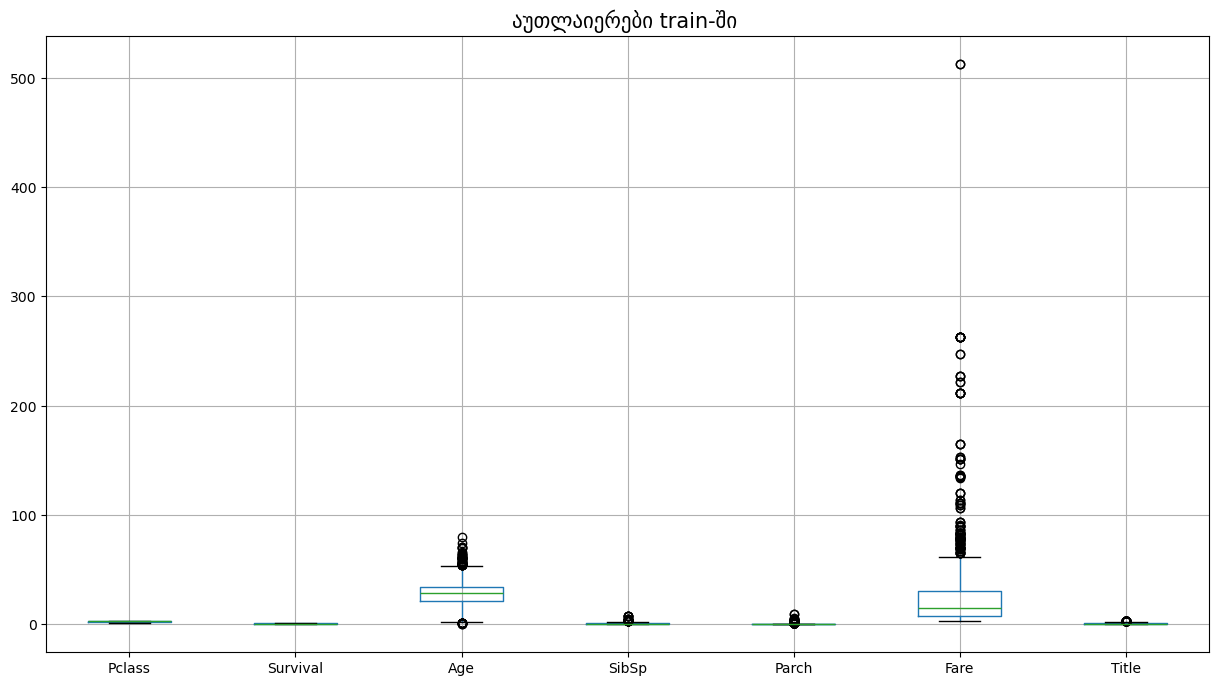

In [1063]:
# ვბახულობთ აუთლიერებს 
plt.figure(figsize=(15, 8))

#ვშლი PassengerId რადგან ვფიქრობ ზედმეტი მონაცემია
train.drop('PassengerId', axis=1).boxplot()
plt.title("აუთლაიერები train-ში ", fontsize=15)
plt.show()

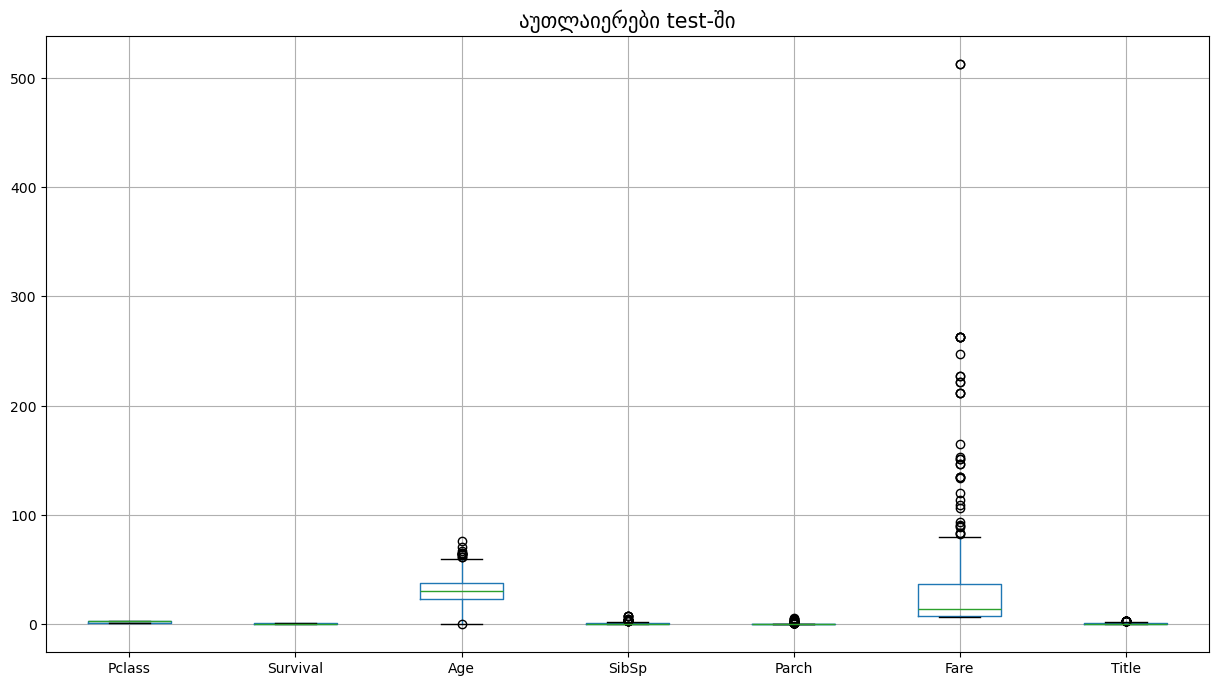

In [1064]:
# ვბახულობთ აუთლიერებს 
plt.figure(figsize=(15, 8))
#ვშლი PassengerId რადგან ვფიქრობ ზედმეტი მონაცემია
test.drop('PassengerId', axis=1).boxplot()
plt.title("აუთლაიერები test-ში", fontsize=15)
plt.show()

In [1065]:
# ასაკის აუტლაიერების შესამცირებლად ავტომატურად დავყობ რეინჯებად
age_bins = pd.qcut(train['Age'].dropna(), q=5, duplicates='drop', retbins=True)[1]
age_labels = list(range(1, len(age_bins)))

In [1066]:
# Fare აუტლაიერების შესამცირებლად ავტომატურად დავყობ რეინჯებად
fare_bins = pd.qcut(train['Fare'], q=4, duplicates='drop', retbins=True)[1]  # Get bin edges
fare_labels = list(range(1, len(fare_bins)))  # Adjust labels dynamically

In [1067]:
age_bins

array([ 0.1667, 20.    , 25.    , 29.    , 38.    , 80.    ])

In [1068]:
fare_bins

array([  3.1708,   7.925 ,  15.0333,  30.5   , 512.3292])

In [1069]:
# შემაქვს მონაცემები test da train დატაში
train['Fare_bin'] = pd.cut(train['Fare'], bins=fare_bins, labels=fare_labels, include_lowest=True)
train['Age_bin'] = pd.cut(train['Age'], bins=age_bins, labels=age_labels, include_lowest=True)


In [1070]:
test['Fare_bin'] = pd.cut(test['Fare'], bins=fare_bins, labels=fare_labels, include_lowest=True)
test['Age_bin'] = pd.cut(test['Age'], bins=age_bins, labels=age_labels, include_lowest=True)


In [1071]:
train.head()

,PassengerId,Pclass,Survival,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Fare_bin,Age_bin
0,1,3,1,female,24.0,0,2,16.7000,S,2,3,2
1,2,1,0,male,46.0,0,0,75.2417,C,0,4,5
2,3,3,0,male,38.0,0,0,7.0500,S,0,1,4
3,4,1,1,female,63.0,1,0,77.9583,S,1,4,5
4,5,2,1,female,29.0,1,0,26.0000,S,2,3,3


In [1072]:
test.head()

,PassengerId,Pclass,Survival,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Fare_bin,Age_bin
0,917,3,0,female,38.0,1,0,14.4583,C,2,2,4
1,918,2,0,male,26.0,0,0,13.0000,S,0,2,3
2,919,1,1,female,29.0,0,0,221.7792,S,1,4,3
3,920,2,1,female,36.0,0,0,13.0000,S,1,2,4
4,921,3,1,female,22.0,1,0,13.9000,S,2,2,2


In [1073]:
# მინდა ზედმეტი სვეტების მოშრება და ვაერთიანებ SibSp და Parch
# Create new columns in the train DataFrame
train['Family_Size'] = train['SibSp'] + train['Parch'] + 1
train['Is_Alone'] = (train['Family_Size'] == 1).astype(int)

test['Family_Size'] = test['SibSp'] + test['Parch'] + 1
test['Is_Alone'] = (test['Family_Size'] == 1).astype(int)

In [1074]:
train.head()

,PassengerId,Pclass,Survival,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Fare_bin,Age_bin,Family_Size,Is_Alone
0,1,3,1,female,24.0,0,2,16.7000,S,2,3,2,3,0
1,2,1,0,male,46.0,0,0,75.2417,C,0,4,5,1,1
2,3,3,0,male,38.0,0,0,7.0500,S,0,1,4,1,1
3,4,1,1,female,63.0,1,0,77.9583,S,1,4,5,2,0
4,5,2,1,female,29.0,1,0,26.0000,S,2,3,3,2,0


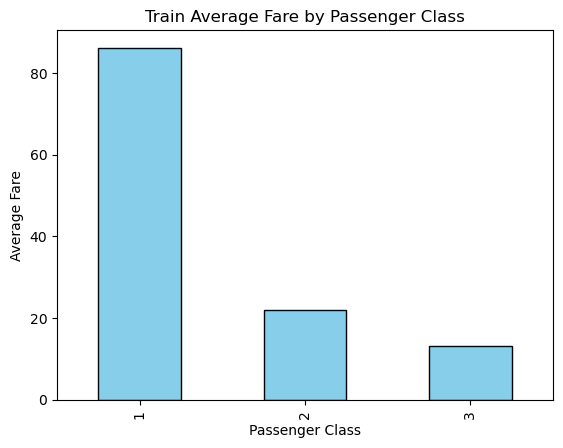

In [1075]:
#ვიდრე fare -ში დავიწყებ აუთლაიერების გასწორებას ვაკეთებ ვიზუალიზაციას კლასების მიხედვით საშუალო fare-s
fare_by_class = train.groupby('Pclass')['Fare'].mean()

fare_by_class.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Train Average Fare by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Average Fare')
plt.show()


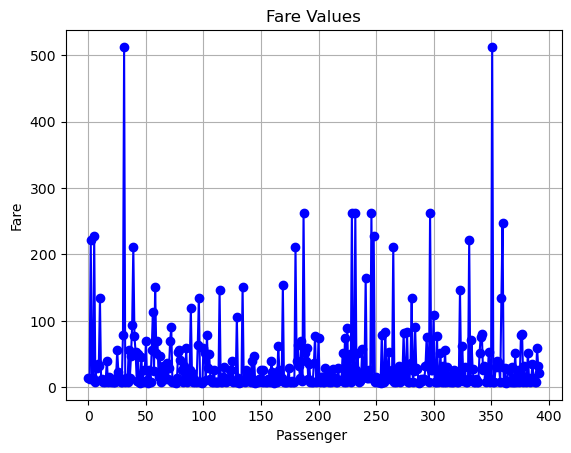

In [1076]:
# ვაკეტებ სრულ სურათს
plt.plot(test['Fare'], linestyle='-', marker='o', color='blue')


plt.title('Fare Values')
plt.xlabel('Passenger ')
plt.ylabel('Fare')
plt.grid()
plt.show()

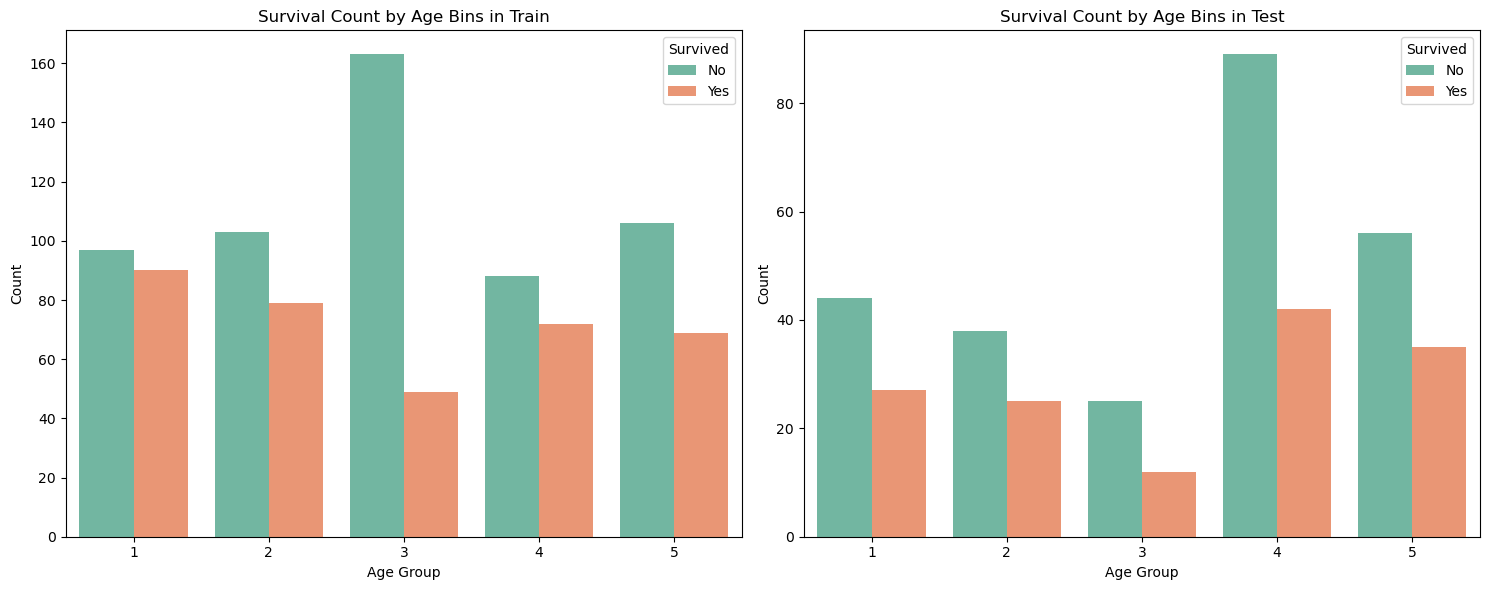

In [1077]:

# ვაკეტებ ვიზუალიზაციას თუ რამდენი გადარჩა ასკის მიხედვით ორივე ფაილში
fig, axes = plt.subplots(1, 2, figsize=(15, 6))  


sns.countplot(data=train, x='Age_bin', hue='Survival', palette='Set2', ax=axes[0])
axes[0].set_title('Survival Count by Age Bins in Train')
axes[0].set_xlabel('Age Group')
axes[0].set_ylabel('Count')
axes[0].legend(title='Survived', labels=['No', 'Yes'])


sns.countplot(data=test, x='Age_bin', hue='Survival', palette='Set2', ax=axes[1])
axes[1].set_title('Survival Count by Age Bins in Test')
axes[1].set_xlabel('Age Group')
axes[1].set_ylabel('Count')
axes[1].legend(title='Survived', labels=['No', 'Yes'])


plt.tight_layout() 
plt.show()



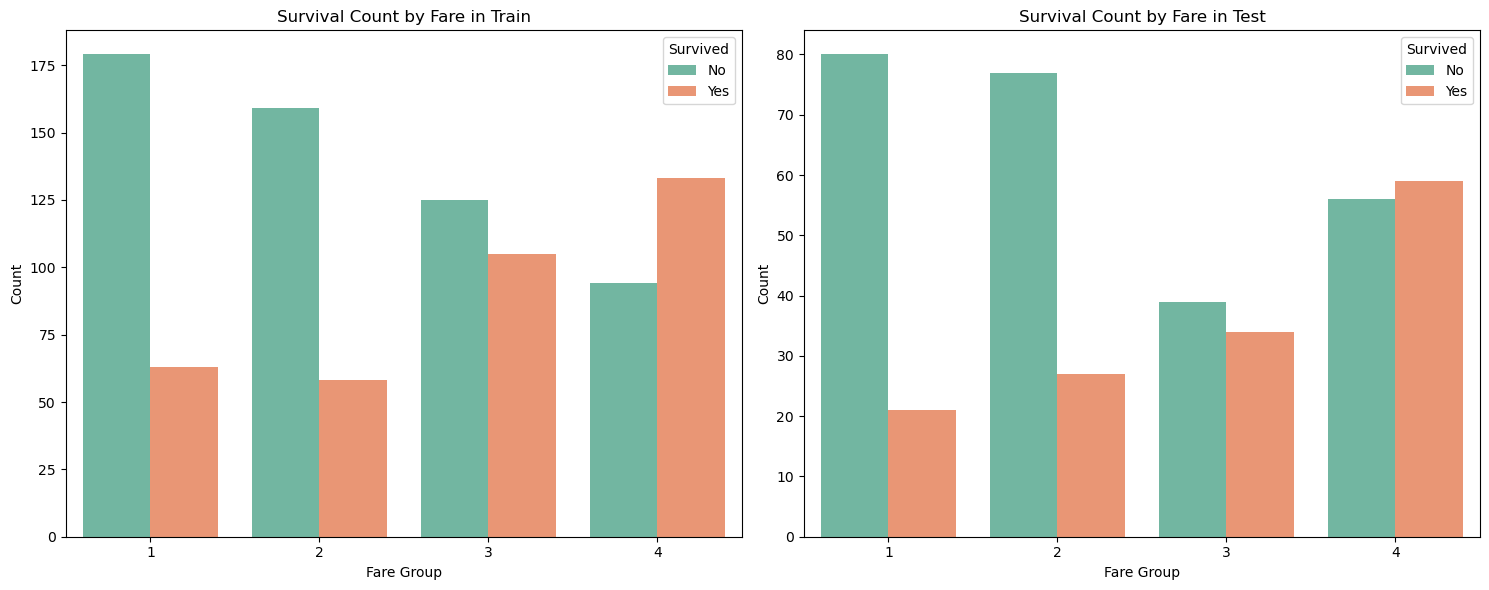

In [1078]:

# # ვაკეტებ ვიზუალიზაციას თუ რამდენი გადარჩა Fare მიხედვით ორივე ფაილში
fig, axes = plt.subplots(1, 2, figsize=(15, 6)) 


sns.countplot(data=train, x='Fare_bin', hue='Survival', palette='Set2', ax=axes[0])
axes[0].set_title('Survival Count by Fare in Train')
axes[0].set_xlabel('Fare Group')
axes[0].set_ylabel('Count')
axes[0].legend(title='Survived', labels=['No', 'Yes'])


sns.countplot(data=test, x='Fare_bin', hue='Survival', palette='Set2', ax=axes[1])
axes[1].set_title('Survival Count by Fare in Test')
axes[1].set_xlabel('Fare Group')
axes[1].set_ylabel('Count')
axes[1].legend(title='Survived', labels=['No', 'Yes'])


plt.tight_layout()  
plt.show()

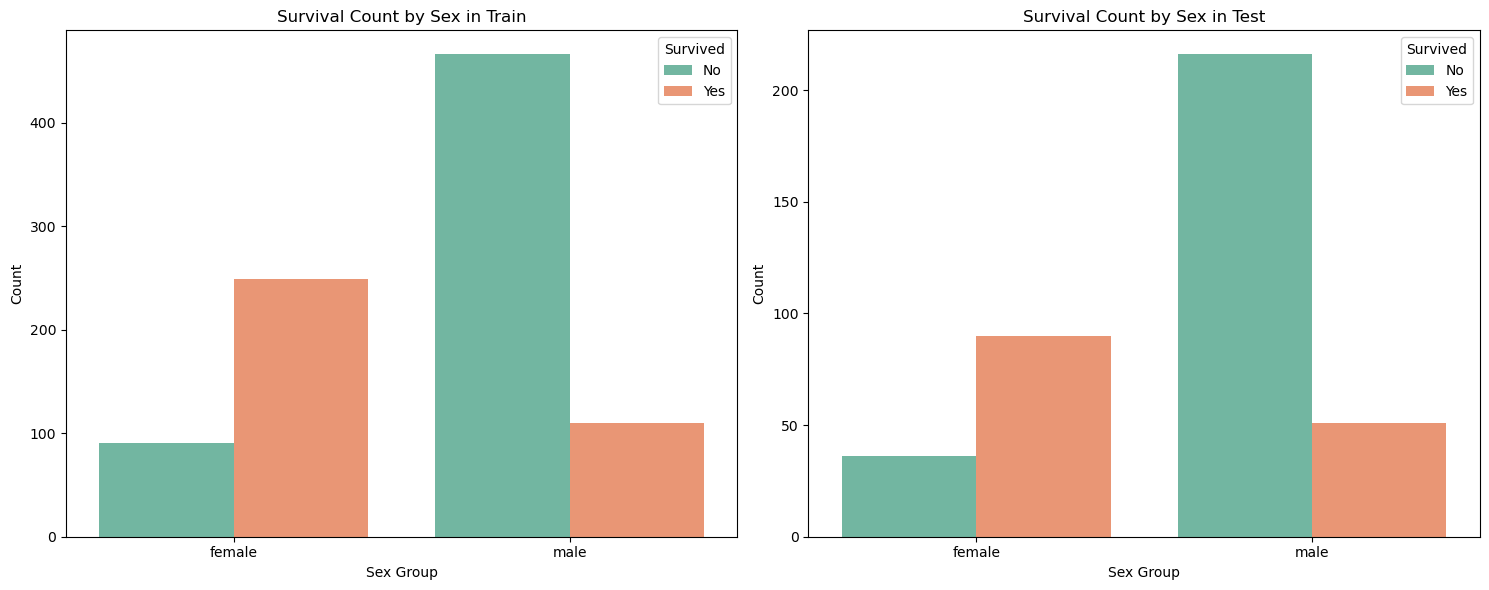

In [1079]:

# ვაკეტებ ვიზუალიზაციას თუ რამდენი გადარჩა სქესის მიხედვით ორივე ფაილში
fig, axes = plt.subplots(1, 2, figsize=(15, 6))  


sns.countplot(data=train, x='Sex', hue='Survival', palette='Set2', ax=axes[0])
axes[0].set_title('Survival Count by Sex in Train')
axes[0].set_xlabel('Sex Group')
axes[0].set_ylabel('Count')
axes[0].legend(title='Survived', labels=['No', 'Yes'])


sns.countplot(data=test, x='Sex', hue='Survival', palette='Set2', ax=axes[1])
axes[1].set_title('Survival Count by Sex in Test')
axes[1].set_xlabel('Sex Group')
axes[1].set_ylabel('Count')
axes[1].legend(title='Survived', labels=['No', 'Yes'])


plt.tight_layout()
plt.show()

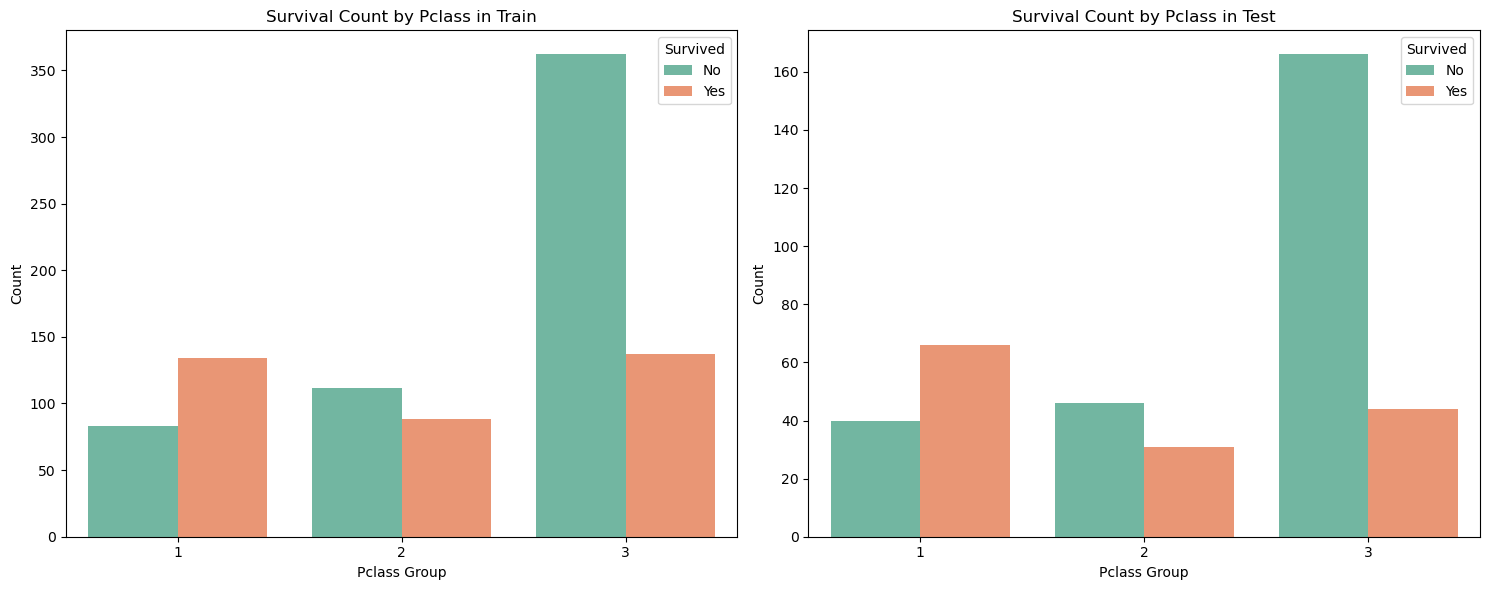

In [1080]:

# ვაკეტებ ვიზუალიზაციას თუ რამდენი გადარჩა კლასების მიხედვით ორივე ფაილში
fig, axes = plt.subplots(1, 2, figsize=(15, 6))  


sns.countplot(data=train, x='Pclass', hue='Survival', palette='Set2', ax=axes[0])
axes[0].set_title('Survival Count by Pclass in Train')
axes[0].set_xlabel('Pclass Group')
axes[0].set_ylabel('Count')
axes[0].legend(title='Survived', labels=['No', 'Yes'])


sns.countplot(data=test, x='Pclass', hue='Survival', palette='Set2', ax=axes[1])
axes[1].set_title('Survival Count by Pclass in Test')
axes[1].set_xlabel('Pclass Group')
axes[1].set_ylabel('Count')
axes[1].legend(title='Survived', labels=['No', 'Yes'])


plt.tight_layout()
plt.show()

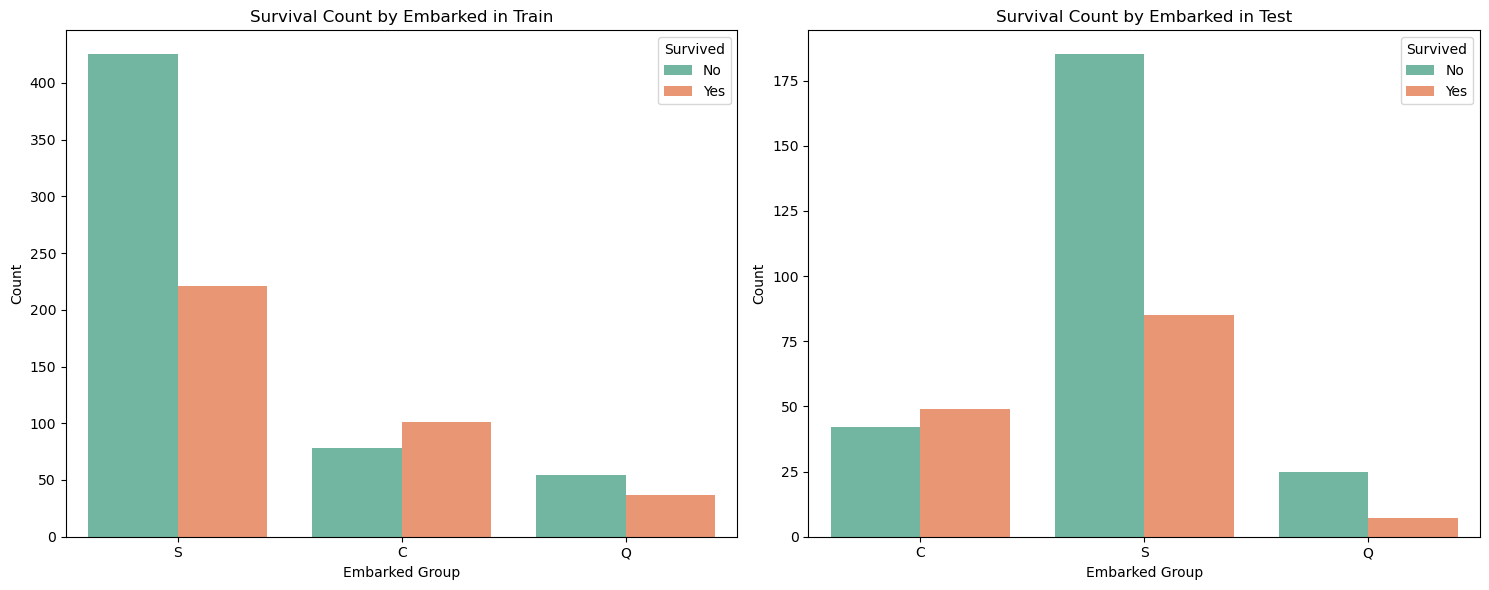

In [1081]:

# ვაკეტებ ვიზუალიზაციას თუ რამდენი გადარჩა წამოსვლის ადგილის - Embarked  მიხედვით ორივე ფაილში
fig, axes = plt.subplots(1, 2, figsize=(15, 6))  


sns.countplot(data=train, x='Embarked', hue='Survival', palette='Set2', ax=axes[0])
axes[0].set_title('Survival Count by Embarked in Train')
axes[0].set_xlabel('Embarked Group')
axes[0].set_ylabel('Count')
axes[0].legend(title='Survived', labels=['No', 'Yes'])


sns.countplot(data=test, x='Embarked', hue='Survival', palette='Set2', ax=axes[1])
axes[1].set_title('Survival Count by Embarked in Test')
axes[1].set_xlabel('Embarked Group')
axes[1].set_ylabel('Count')
axes[1].legend(title='Survived', labels=['No', 'Yes'])


plt.tight_layout()
plt.show()

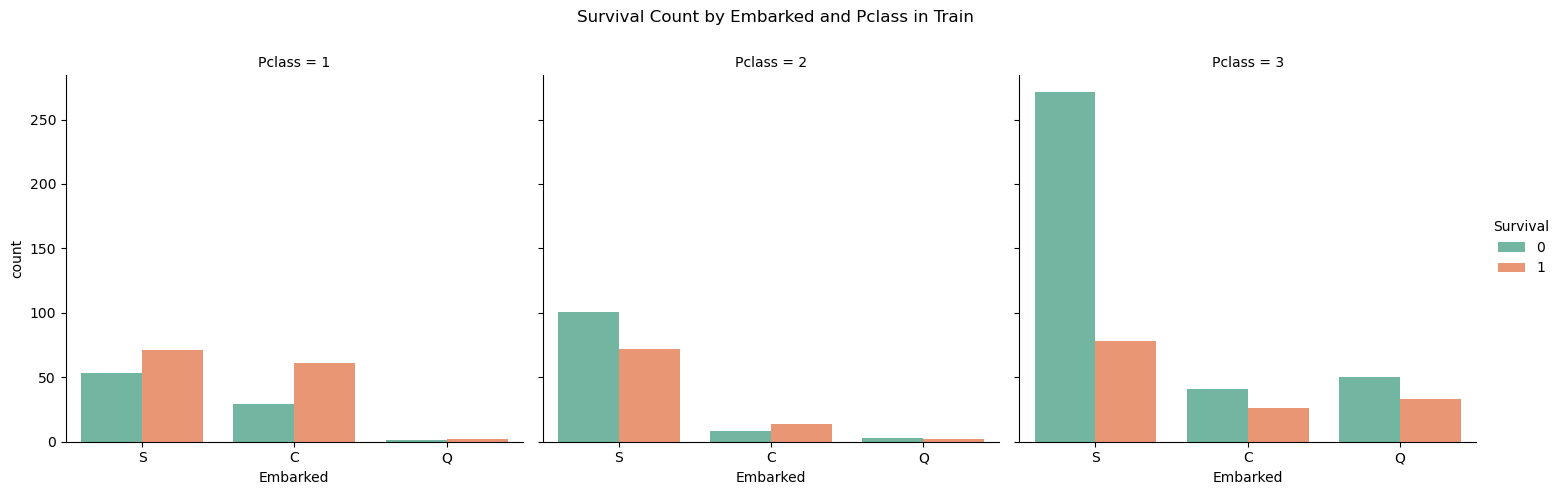

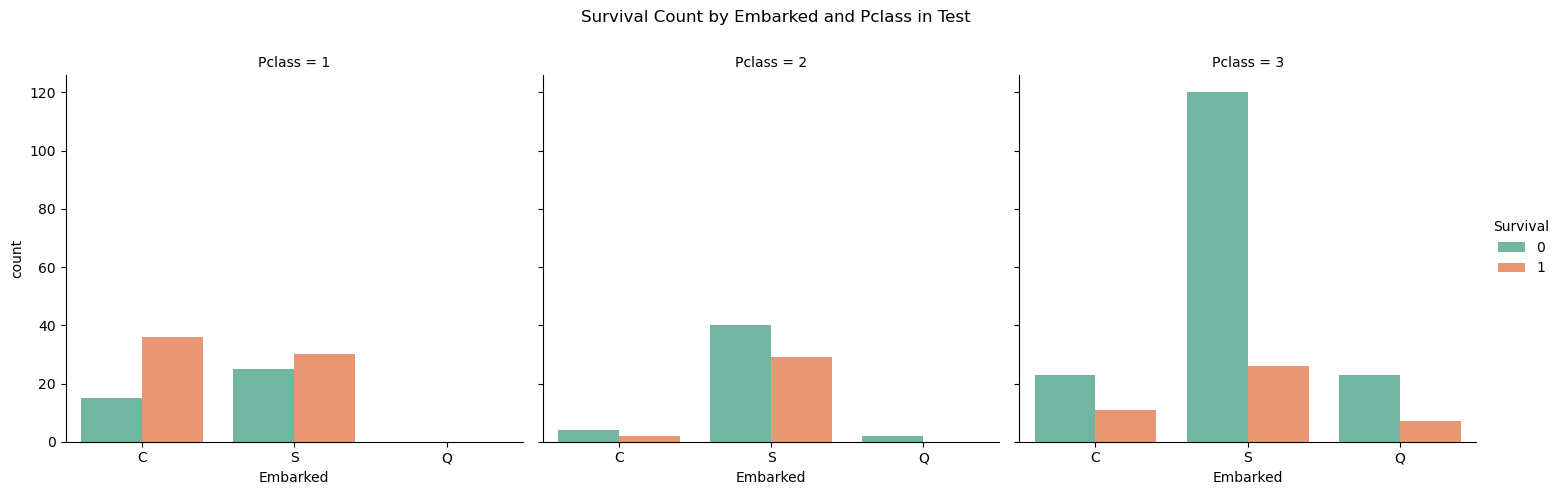

In [1082]:

# ვაკეტებ ვიზუალიზაციას თუ რამდენი გადარჩა წამოსვლის ადგილის - Embarked და Pclass მიხედვით ორივე ფაილში
def plot_comparison(data, dataset_name):
    sns.catplot(
        data=data,
        x='Embarked',
        hue='Survival',
        col='Pclass',
        kind='count',
        palette='Set2',
        height=5,
        aspect=1
    )
    plt.subplots_adjust(top=0.85)
    plt.suptitle(f'Survival Count by Embarked and Pclass in {dataset_name}')


plot_comparison(train, 'Train')

plot_comparison(test, 'Test')

plt.show()


In [1083]:
# რადგან მოდელში მჭირდება მხოლოდ ნუმერიკული მონაცემები ამიტომ ვცვლი  female -1 და male -0
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})
test['Sex'] = test['Sex'].map({'male': 0, 'female': 1})
train.head()


,PassengerId,Pclass,Survival,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Fare_bin,Age_bin,Family_Size,Is_Alone
0,1,3,1,1,24.0,0,2,16.7000,S,2,3,2,3,0
1,2,1,0,0,46.0,0,0,75.2417,C,0,4,5,1,1
2,3,3,0,0,38.0,0,0,7.0500,S,0,1,4,1,1
3,4,1,1,1,63.0,1,0,77.9583,S,1,4,5,2,0
4,5,2,1,1,29.0,1,0,26.0000,S,2,3,3,2,0


In [1084]:
test.head()

,PassengerId,Pclass,Survival,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Fare_bin,Age_bin,Family_Size,Is_Alone
0,917,3,0,1,38.0,1,0,14.4583,C,2,2,4,2,0
1,918,2,0,0,26.0,0,0,13.0000,S,0,2,3,1,1
2,919,1,1,1,29.0,0,0,221.7792,S,1,4,3,1,1
3,920,2,1,1,36.0,0,0,13.0000,S,1,2,4,1,1
4,921,3,1,1,22.0,1,0,13.9000,S,2,2,2,2,0


In [1085]:
# ვამატებ ახალ სვეტს 'Embarked_num' რიცხვობრივი მონაცემებით 'Embarked', სადაც 'C'არის 1, 'Q'არის 2, 'S'არის 3
train['Embarked_num'] = train['Embarked'].map({'C': 1, 'Q': 2, 'S': 3})
test['Embarked_num'] = test['Embarked'].map({'C': 1, 'Q': 2, 'S': 3})

train.head()


,PassengerId,Pclass,Survival,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Fare_bin,Age_bin,Family_Size,Is_Alone,Embarked_num
0,1,3,1,1,24.0,0,2,16.7000,S,2,3,2,3,0,3
1,2,1,0,0,46.0,0,0,75.2417,C,0,4,5,1,1,1
2,3,3,0,0,38.0,0,0,7.0500,S,0,1,4,1,1,3
3,4,1,1,1,63.0,1,0,77.9583,S,1,4,5,2,0,3
4,5,2,1,1,29.0,1,0,26.0000,S,2,3,3,2,0,3


In [1086]:
# ვშლი 'Embarked' რადგან აღარ მჭირდება
train = train.drop('Embarked', axis=1)
test = test.drop('Embarked', axis=1)

train.head()


,PassengerId,Pclass,Survival,Sex,Age,SibSp,Parch,Fare,Title,Fare_bin,Age_bin,Family_Size,Is_Alone,Embarked_num
0,1,3,1,1,24.0,0,2,16.7000,2,3,2,3,0,3
1,2,1,0,0,46.0,0,0,75.2417,0,4,5,1,1,1
2,3,3,0,0,38.0,0,0,7.0500,0,1,4,1,1,3
3,4,1,1,1,63.0,1,0,77.9583,1,4,5,2,0,3
4,5,2,1,1,29.0,1,0,26.0000,2,3,3,2,0,3


In [1087]:
test.head()

,PassengerId,Pclass,Survival,Sex,Age,SibSp,Parch,Fare,Title,Fare_bin,Age_bin,Family_Size,Is_Alone,Embarked_num
0,917,3,0,1,38.0,1,0,14.4583,2,2,4,2,0,1
1,918,2,0,0,26.0,0,0,13.0000,0,2,3,1,1,3
2,919,1,1,1,29.0,0,0,221.7792,1,4,3,1,1,3
3,920,2,1,1,36.0,0,0,13.0000,1,2,4,1,1,3
4,921,3,1,1,22.0,1,0,13.9000,2,2,2,2,0,3


In [1088]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   393 non-null    int64   
 1   Pclass        393 non-null    int64   
 2   Survival      393 non-null    int64   
 3   Sex           393 non-null    int64   
 4   Age           393 non-null    float64 
 5   SibSp         393 non-null    int64   
 6   Parch         393 non-null    int64   
 7   Fare          393 non-null    float64 
 8   Title         393 non-null    int64   
 9   Fare_bin      393 non-null    category
 10  Age_bin       393 non-null    category
 11  Family_Size   393 non-null    int64   
 12  Is_Alone      393 non-null    int32   
 13  Embarked_num  393 non-null    int64   
dtypes: category(2), float64(2), int32(1), int64(9)
memory usage: 36.6 KB


In [1089]:

train['Fare_bin'] = train['Fare_bin'].astype('category').cat.codes + 1
train['Age_bin'] = train['Age_bin'].astype('category').cat.codes + 1
test['Fare_bin'] = test['Fare_bin'].astype('category').cat.codes + 1
test['Age_bin'] = test['Age_bin'].astype('category').cat.codes + 1

In [1090]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   916 non-null    int64  
 1   Pclass        916 non-null    int64  
 2   Survival      916 non-null    int64  
 3   Sex           916 non-null    int64  
 4   Age           916 non-null    float64
 5   SibSp         916 non-null    int64  
 6   Parch         916 non-null    int64  
 7   Fare          916 non-null    float64
 8   Title         916 non-null    int64  
 9   Fare_bin      916 non-null    int8   
 10  Age_bin       916 non-null    int8   
 11  Family_Size   916 non-null    int64  
 12  Is_Alone      916 non-null    int32  
 13  Embarked_num  916 non-null    int64  
dtypes: float64(2), int32(1), int64(9), int8(2)
memory usage: 84.2 KB


In [1091]:
train = train.drop(columns=['Fare'])
test = test.drop(columns=['Fare'])

### Feature Engineering

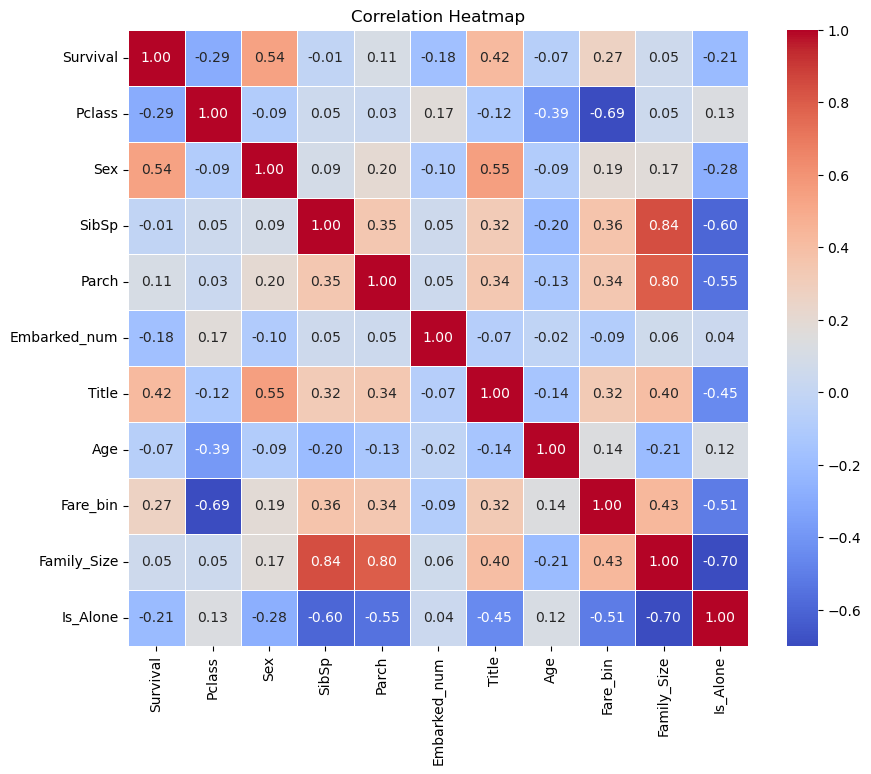

In [1093]:

# ვაკეთებ კორელაციას რათა თავიდან ავიცილო მულტიკოლინეარობა და წავშალო ის სვეტები რომელიც ხელს მიშლის
columns_for_heatmap = ['Survival','Pclass', 'Sex', 'SibSp', 
                       'Parch','Embarked_num', 'Title', 'Age', 'Fare_bin','Family_Size', 'Is_Alone']

# ვაგებ correlation matrix
correlation_matrix_train = train[columns_for_heatmap].corr()

# a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_train, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)


plt.title('Correlation Heatmap')
plt.show()


In [1094]:
print(correlation_matrix_train["Survival"].sort_values(ascending=False))

Survival        1.000000
Sex             0.535770
Title           0.415982
Fare_bin        0.267045
Parch           0.107847
Family_Size     0.053284
SibSp          -0.013769
Age            -0.067763
Embarked_num   -0.176082
Is_Alone       -0.211680
Pclass         -0.290122
Name: Survival, dtype: float64


### Check Variance Inflation Factor (VIF)

In [1096]:
# ვანგარიშობ VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

features = train.drop(columns=['Survival']) 

features = features.select_dtypes(include=['number'])

vif_data = pd.DataFrame()
vif_data["Feature"] = features.columns
vif_data["VIF"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]

print(vif_data)


         Feature         VIF
0    PassengerId    1.007487
1         Pclass    3.066081
2            Sex    1.489353
3            Age    6.293701
4          SibSp  116.515701
5          Parch   90.897192
6          Title    1.770665
7       Fare_bin    3.583040
8        Age_bin    5.917672
9    Family_Size  579.502631
10      Is_Alone    2.347381
11  Embarked_num    1.053287


In [1097]:
features = test.drop(columns=['Survival']) 

features = features.select_dtypes(include=['number'])

vif_data = pd.DataFrame()
vif_data["Feature"] = features.columns
vif_data["VIF"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]

print(vif_data)


         Feature          VIF
0    PassengerId     1.032512
1         Pclass     3.321895
2            Sex     1.680474
3            Age     4.808412
4          SibSp   320.405498
5          Parch   160.979296
6          Title     1.819394
7       Fare_bin     4.060381
8        Age_bin     4.587160
9    Family_Size  1293.132878
10      Is_Alone     2.253853
11  Embarked_num     1.094993


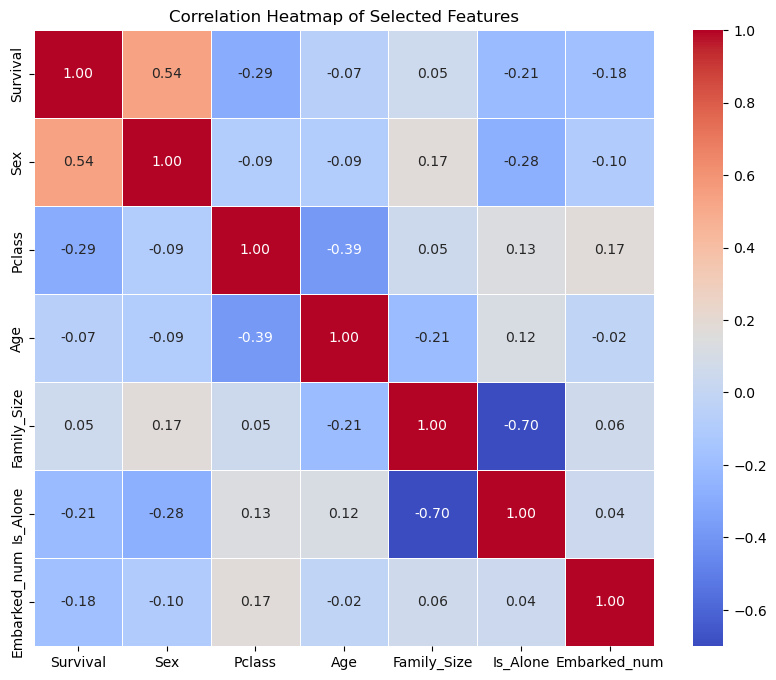

In [1098]:

# 
columns_for_heatmap = ['Survival', 'Sex', 'Pclass', 'Age', 
                       'Family_Size', 'Is_Alone', 'Embarked_num']


correlation_matrix = train[columns_for_heatmap].corr()


plt.figure(figsize=(10, 8))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)


plt.title('Correlation Heatmap of Selected Features')
plt.show()



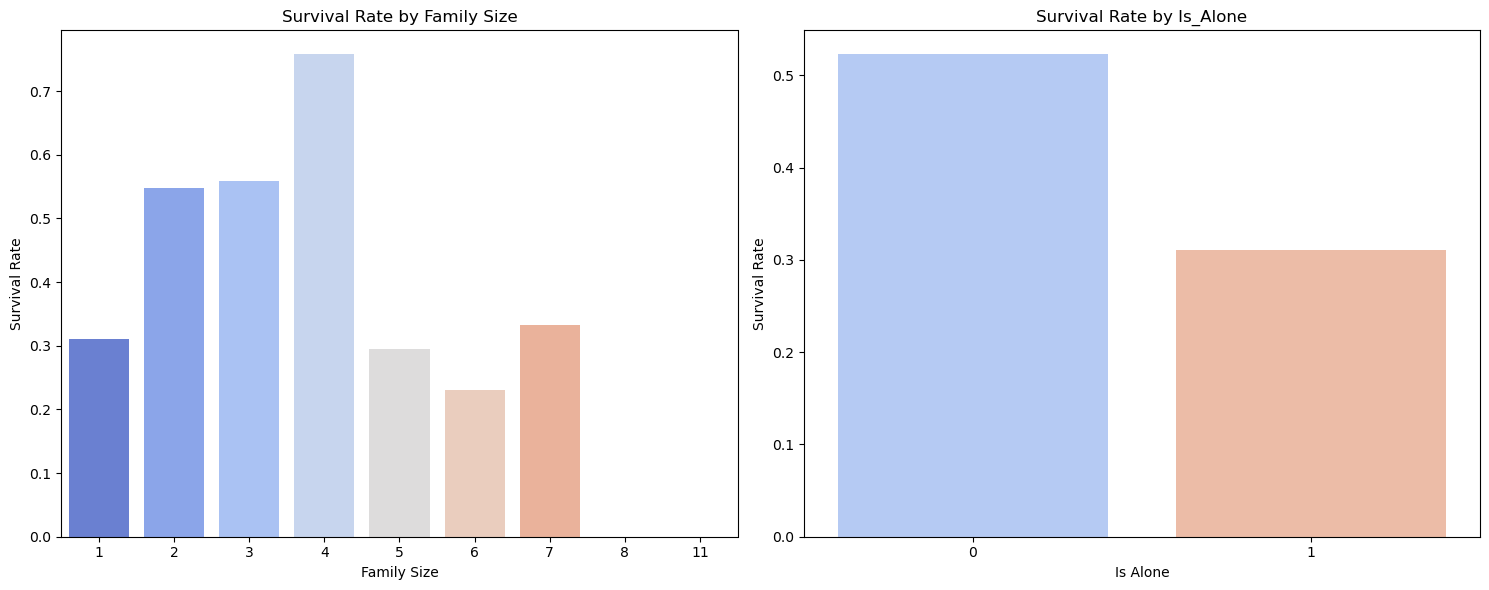

In [1099]:
# !!! მოვიფიქრო რომელი წავშალო family size თუ is alone


plt.figure(figsize=(15, 6))


plt.subplot(1, 2, 1) 
sns.barplot(data=train, x='Family_Size', y='Survival', ci=None, palette='coolwarm')
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')


plt.subplot(1, 2, 2)  
sns.barplot(data=train, x='Is_Alone', y='Survival', ci=None, palette='coolwarm')
plt.title('Survival Rate by Is_Alone')
plt.xlabel('Is Alone')
plt.ylabel('Survival Rate')


plt.tight_layout()
plt.show()


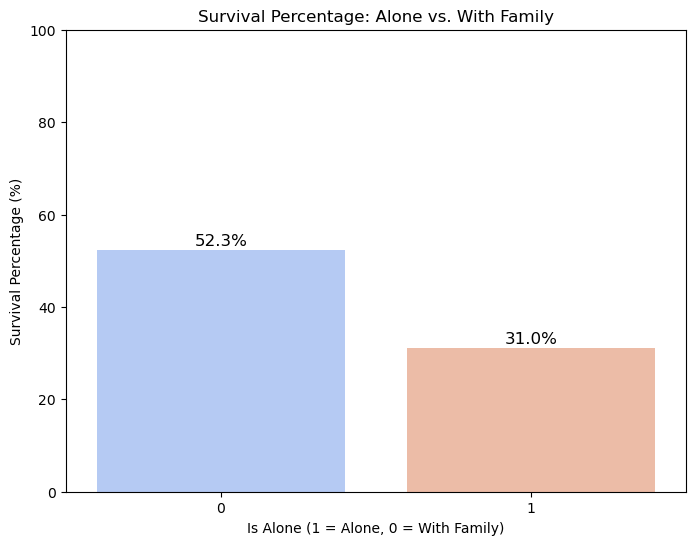

In [1100]:


survival_percentages = train.groupby('Is_Alone')['Survival'].mean() * 100

plt.figure(figsize=(8, 6))
sns.barplot(x=survival_percentages.index, y=survival_percentages.values, palette='coolwarm')


plt.title('Survival Percentage: Alone vs. With Family')
plt.xlabel('Is Alone (1 = Alone, 0 = With Family)')
plt.ylabel('Survival Percentage (%)')


for i, percentage in enumerate(survival_percentages.values):
    plt.text(x=i, y=percentage + 1, s=f'{percentage:.1f}%', ha='center', fontsize=12)

plt.ylim(0, 100)  
plt.show()


In [1101]:
# ვაკოპირებ PassengerId ვიდრე წავშლი
passenger_ids = test['PassengerId'].copy()

In [1102]:
# !!!!
# თავიდან ასაცილებლად მულტიკოლინეარობის უნდა წავშალო

drop_cols = ["Parch", "SibSp","Is_Alone","PassengerId","Age_bin"]

# ახალ ფაილებს ვქმნი უკვე გასუფთავებულს
train_cleaned = train.drop(columns=drop_cols)
test_cleaned= test.drop(columns=drop_cols)

train_cleaned

,Pclass,Survival,Sex,Age,Title,Fare_bin,Family_Size,Embarked_num
0,3,1,1,24.0,2,3,3,3
1,1,0,0,46.0,0,4,1,1
2,3,0,0,38.0,0,1,1,3
3,1,1,1,63.0,1,4,2,3
4,2,1,1,29.0,2,3,2,3
...,...,...,...,...,...,...,...,...
911,1,1,1,34.0,2,4,2,1
912,2,1,1,40.0,1,2,1,3
913,3,0,1,26.0,2,3,2,3
914,1,0,0,33.0,0,3,1,3


In [1103]:
test_cleaned

,Pclass,Survival,Sex,Age,Title,Fare_bin,Family_Size,Embarked_num
0,3,0,1,38.0,2,2,2,1
1,2,0,0,26.0,0,2,1,3
2,1,1,1,29.0,1,4,1,3
3,2,1,1,36.0,1,2,1,3
4,3,1,1,22.0,2,2,2,3
...,...,...,...,...,...,...,...,...
388,3,0,0,42.0,0,1,1,3
389,3,0,0,17.0,0,1,1,3
390,1,0,0,40.0,0,4,1,3
391,3,0,1,9.0,1,4,7,3


In [1104]:
# საბოლოოდ დავიტოვე შემდეგი სვეტები მოდელის ასაგებად : Pclass  , Title , Sex  , Age  , Family_Size  , Embarked_num , Fare_bin  .

In [1105]:
# ახლიდან დავიანგარიშე VIF
features = train_cleaned.drop(columns=['Survival']) 

features = features.select_dtypes(include=['number'])

vif_data = pd.DataFrame()
vif_data["Feature"] = features.columns
vif_data["VIF"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]

print(vif_data)

        Feature        VIF
0        Pclass   7.338970
1           Sex   2.300791
2           Age   5.763751
3         Title   2.719006
4      Fare_bin   8.373593
5   Family_Size   4.067590
6  Embarked_num  10.557715


In [1106]:
# ახლიდან დავიანგარიშე VIF აქაც
features = test_cleaned.drop(columns=['Survival']) 
features = features.select_dtypes(include=['number'])

vif_data = pd.DataFrame()
vif_data["Feature"] = features.columns
vif_data["VIF"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]

print(vif_data)

        Feature       VIF
0        Pclass  7.073644
1           Sex  2.397419
2           Age  6.201973
3         Title  2.559350
4      Fare_bin  9.103601
5   Family_Size  3.992851
6  Embarked_num  9.208282


##  Model Building

### Check Assumptions for Logistic Regression

* Linearity of the log-odds: Logistic regression assumes that there is a linear relationship between the independent variables (features) and the log-odds of the dependent variable (target). Not needed for binned or categorical variables ✅
* No multicollinearity: We've already addressed this by removing multicollinearity ✅
* Independence of observations: This assumes that our data points are independent of each other- As data is independent, no need to check it ✅
* Absence of outliers: Outliers can significantly affect the performance of logistic regression- Outliers are typically an issue in continuous numerical variables, Binned variables (FareBin, AgeBin) already address outliers in continuous variables by grouping them into meaningful categories✅

### Logistic Regression

In [1111]:
# ვიწყებ ლოჯისტიკ რეგრესიას

X_train_cleaned = train_cleaned.drop(columns=["Survival"]) 
y_train_cleaned = train_cleaned["Survival"]                

X_test_cleaned = test_cleaned.drop(columns=["Survival"])    
y_test_cleaned = test_cleaned["Survival"]                 

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_cleaned)
X_test_scaled = scaler.transform(X_test_cleaned)

# ვაგებ Logistic Regression model-ს
model = LogisticRegression()
model.fit(X_train_scaled, y_train_cleaned)

# ვაკეტებ  predictions -ს test -ზე
y_pred = model.predict(X_test_scaled)

# მოდელის შეფასება
def evaluate_model(y_true, y_pred, model_name):
    print(f'--- {model_name} Performance ---')
    print(f'Accuracy: {accuracy_score(y_true, y_pred):.4f}')
    print(f'Precision: {precision_score(y_true, y_pred):.4f}')
    print(f'Recall: {recall_score(y_true, y_pred):.4f}')
    print(f'F1 Score: {f1_score(y_true, y_pred):.4f}')
    print('\n')

# ვიძახებ ფუნქციას
evaluate_model(y_test_cleaned, y_pred, "Logistic Regression")


--- Logistic Regression Performance ---
Accuracy: 0.8193
Precision: 0.7692
Recall: 0.7092
F1 Score: 0.7380




### XGBoost Model

In [1113]:
from xgboost import XGBClassifier


In [1114]:
#  ვიწყებ XGBoost Model-ს

X_train = train_cleaned.drop(columns=['Survival'])
y_train = train_cleaned['Survival']
X_test = test_cleaned.drop(columns=['Survival'])
y_test = test_cleaned['Survival']

xgb = XGBClassifier(
    use_label_encoder=False, eval_metric='logloss',
    scale_pos_weight=1.2, learning_rate=0.05, max_depth=4, n_estimators=200
)
#xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# შეფასება XGboost model-ის
evaluate_model(y_test, y_pred_xgb, "XGBoost")


--- XGBoost Performance ---
Accuracy: 0.8372
Precision: 0.8348
Recall: 0.6809
F1 Score: 0.7500




### Result

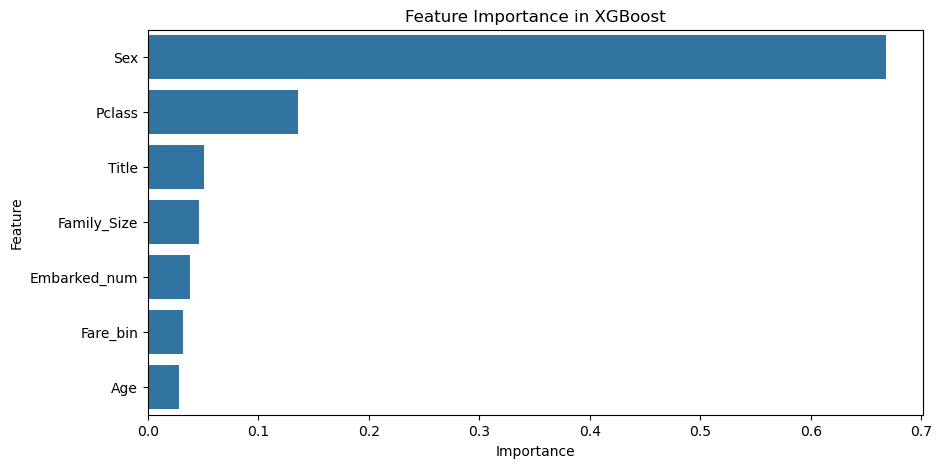

In [1116]:
#ვამოწმებ მნიშვნელოვან Feature-ებს  XGBoost -ში

feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': xgb.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance in XGBoost')
plt.show()

In [1117]:
#  ვქმნით ფაილს ასატვირთად
test_predictions = xgb.predict(X_test)  

In [1118]:
# Binary (0 or 1):
test_predictions = (test_predictions > 0.5).astype(int) 


In [1119]:
# Create the submission DataFrame
submission = pd.DataFrame({'PassengerId': passenger_ids, 'Survival': test_predictions})

# Save the submission file
submission.to_csv('submission.csv', index=False)